In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.shape)
print(df.head())
print(df.columns.values)

(7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Co

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Get unique values for categorical data
for column in df:
    if column not in ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']:
        print(column)
        print(df[column].unique())

gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn
['No' 'Yes']


In [6]:
# Drop unnecessary column
df_new = df.drop('customerID', axis=1)

#Count Null values
df_new['TotalCharges'] = pd.to_numeric(df_new['TotalCharges'], errors='coerce')
df_new.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
#Drop the 11 records with Null values
df_new.dropna(inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [8]:
#Convert response variable to binary value
for key, value in enumerate(df_new['Churn'].unique()):
    df_new['Churn'].replace(to_replace=value, value=key, inplace=True)

df_new.to_csv('../data/processed/WA_Fn-UseC_-Telco-Customer-Churn.csv', index=False)
df_new.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [10]:
#Replace categories with dummy variables
df_dummies = pd.get_dummies(df_new)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [11]:
df_dummies.info()
df_dummies.to_csv('../data/processed/WA_Fn-UseC_-Telco-Customer-Churn-Dummies.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   uint8  
 6   gender_Male                              7032 non-null   uint8  
 7   Partner_No                               7032 non-null   uint8  
 8   Partner_Yes                              7032 non-null   uint8  
 9   Dependents_No                            7032 non-null   uint8  
 10  Dependents_Yes                           7032 no

## Data Exploration

Churn rate: 26.54%


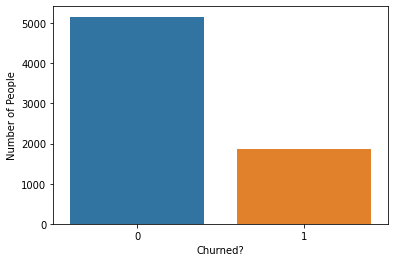

In [12]:
# Number of churn
y = df_new['Churn'].value_counts()
sns.barplot(x=y.index, y=y.values)
plt.xlabel('Churned?')
plt.ylabel('Number of People')

plt.savefig('../images/churn_freq.jpg')

#Churn Rate
y_yes = df['Churn'][df['Churn'] == 'Yes']
print(f'Churn rate: {y_yes.shape[0] / df.shape[0] * 100:.2f}%')

In [13]:
df_new[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [14]:
def multi_histogram(x, y, df, path=None):
    plt.figure(figsize=(30, 90))
    for i, j in enumerate(y):
        number = i + 1
        plt.subplot(3, 1, number)
        ax = sns.boxplot(x=x, y=j, data=df)
        ax.set_title(j)
    if path:
        plt.savefig(path)
    return plt.show()

In [15]:

def multi_countplot(x, df, y=None, path=None):
    plt.figure(figsize=(40, 40))
    for i, j in enumerate(x):
        number = i + 1
        plt.subplot(5, 4, number)
        ax = sns.countplot(x=j, data=df, hue=y)
        ax.set_title(j)
        for p, q in enumerate(ax.patches):
            height = q.get_height()
            ax.text(q.get_x()+q.get_width()/2., height + 20, height, ha="center")
    if path:
        plt.savefig(path)
    return plt.show()



In [16]:

charts = [
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'BinnedTenure',
 'BinnedMonthlyCharges'
 ]
multi_countplot(charts, df_new, path='../images/category_freq_cleaned.jpg')

ValueError: Could not interpret input 'BinnedTenure'

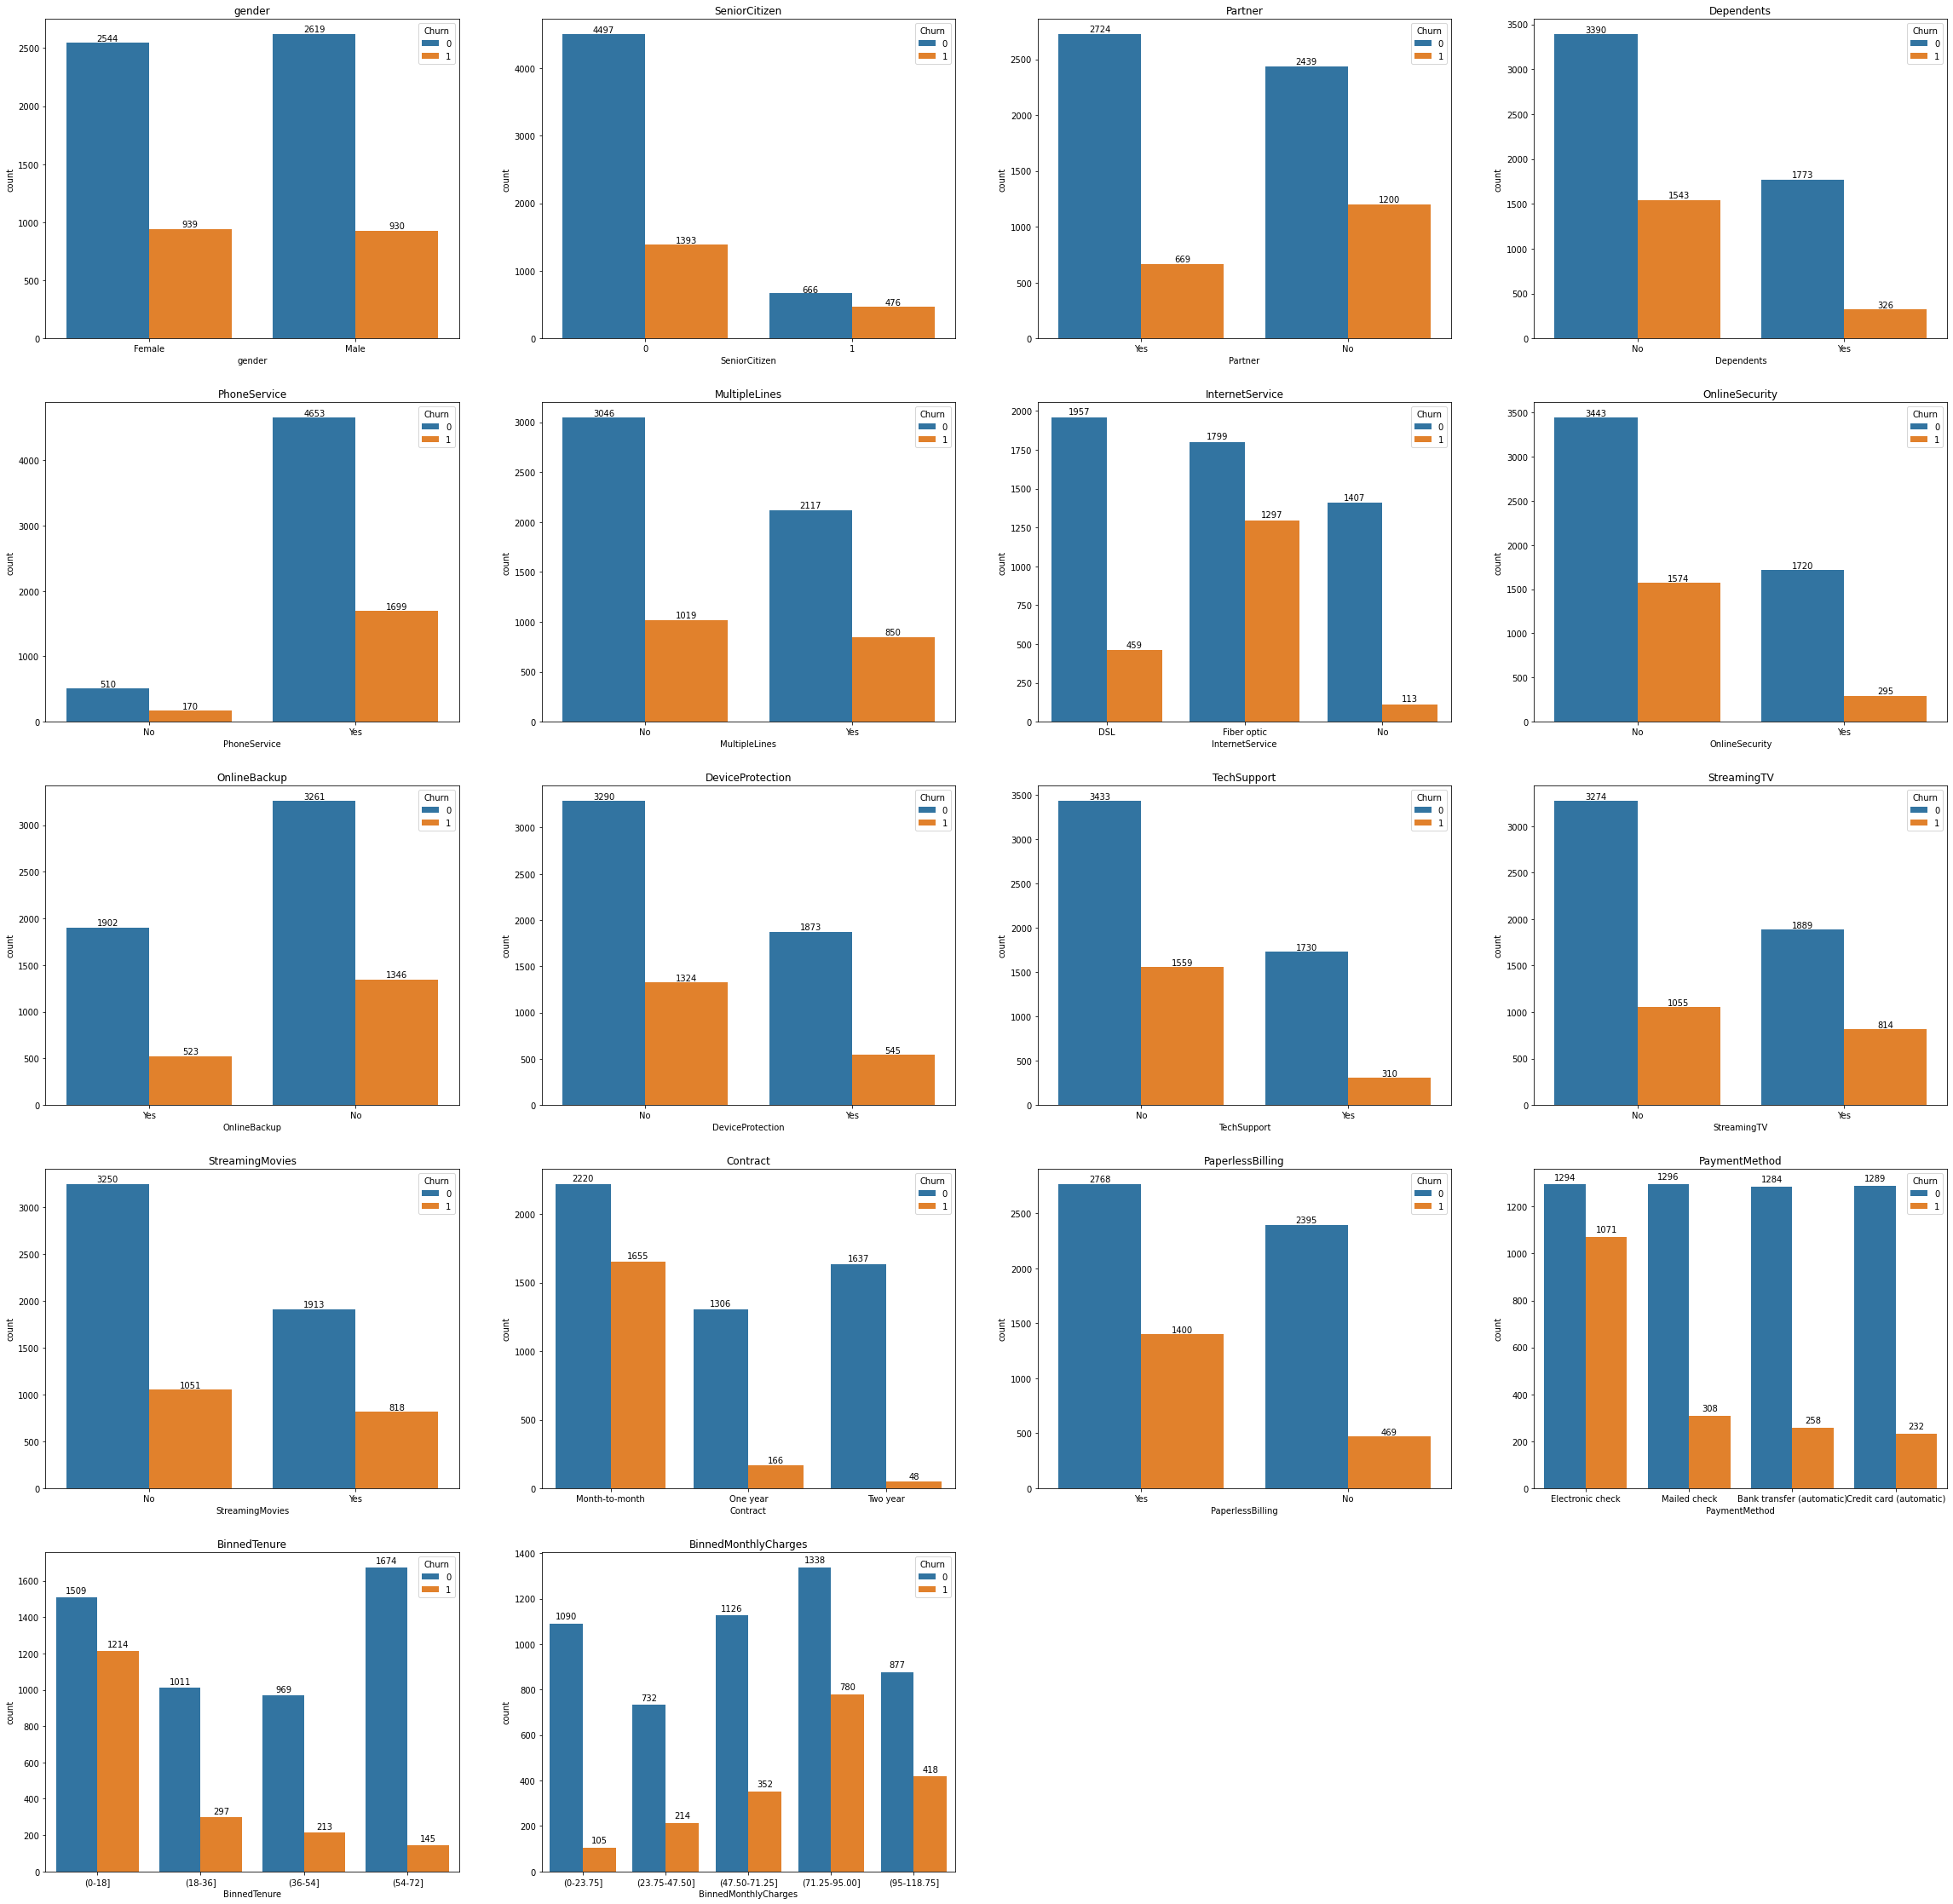

In [74]:
multi_countplot(charts, df_new, 'Churn','../images/bivariate_freq_cleaned.jpg')

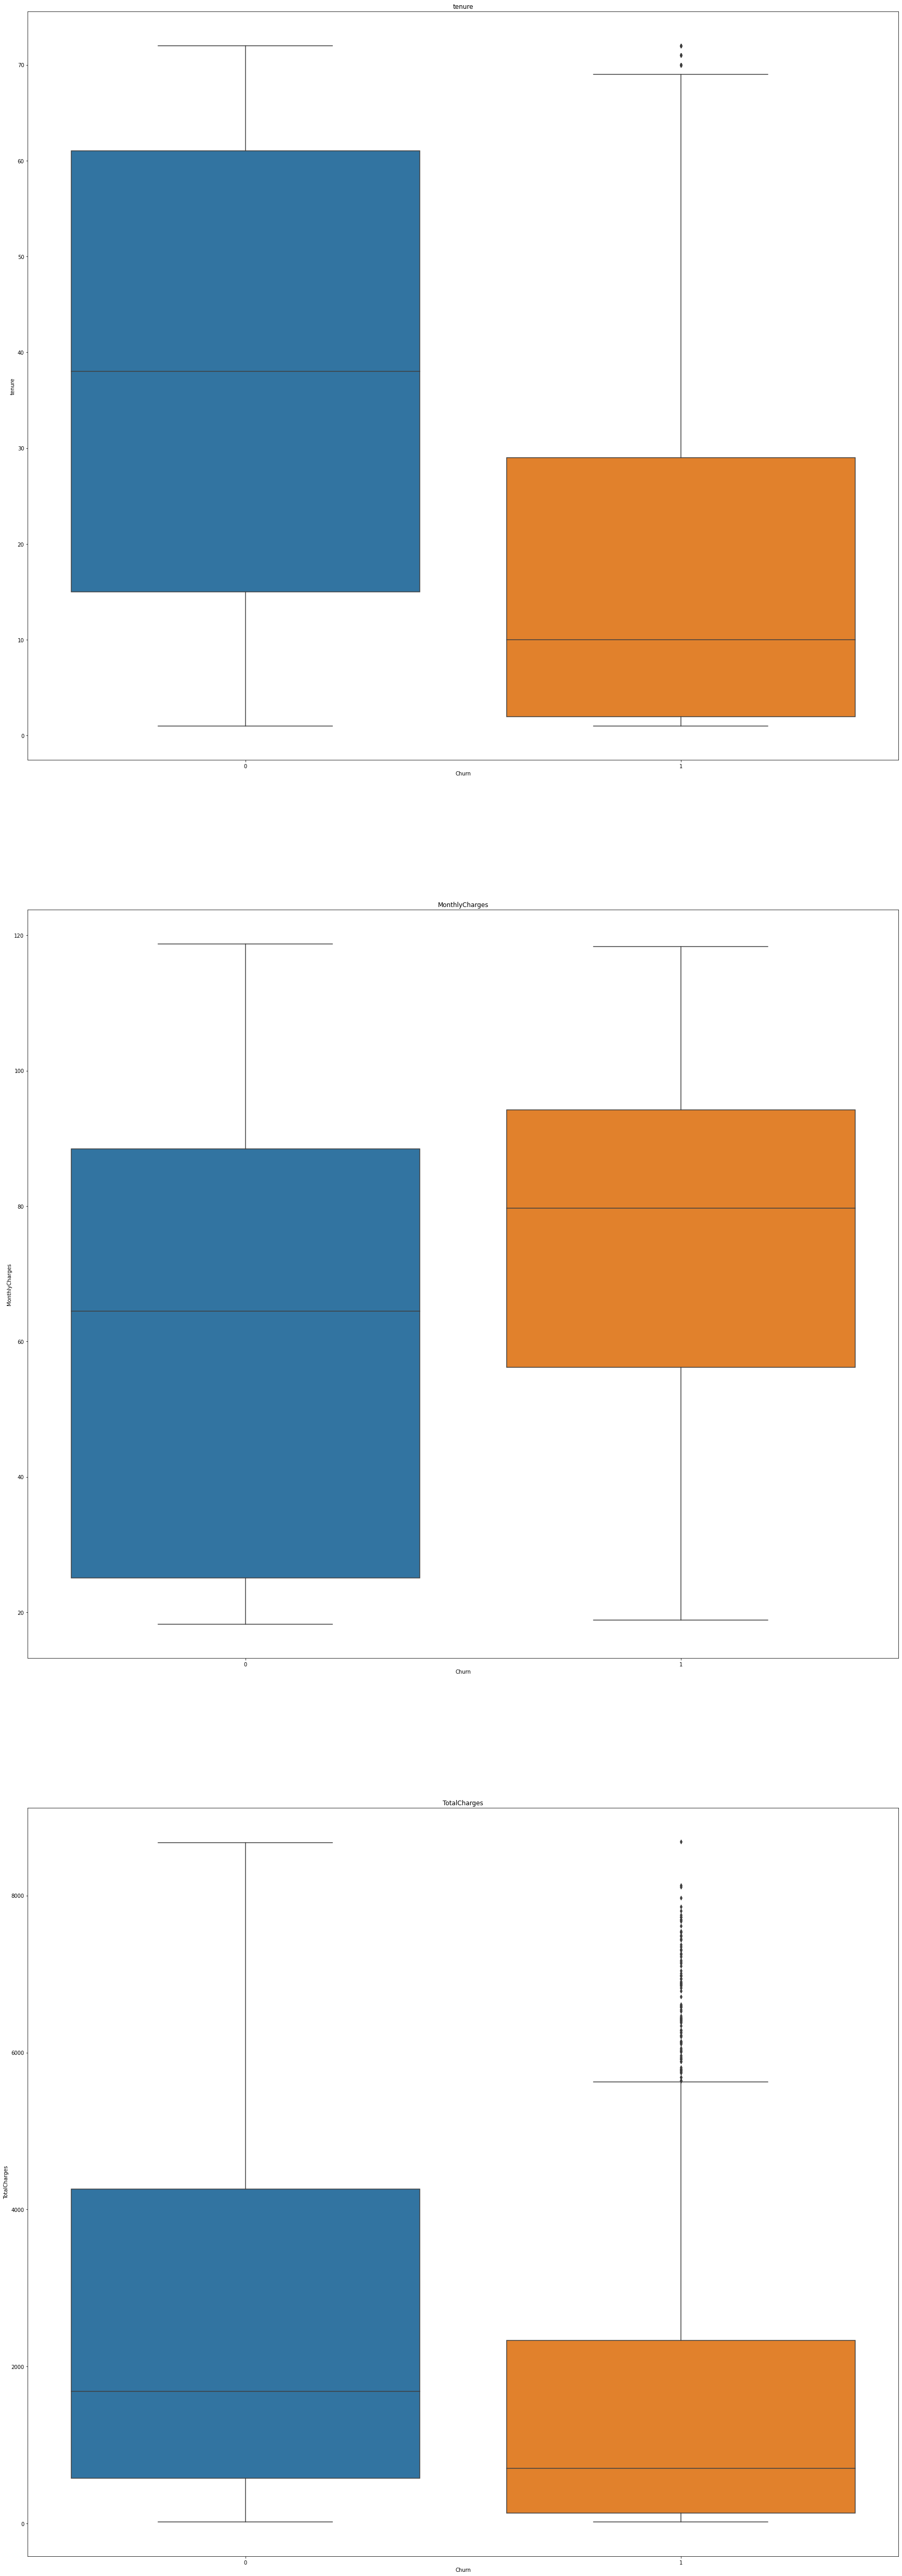

In [17]:
charts = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
]
multi_histogram('Churn', charts, df_new, path='../images/continuous_boxplots.jpg')

In [18]:
cuts = np.linspace(0, df_new['tenure'].max(), 5)
cuts_labels = ['(0-18]', '(18-36]', '(36-54]', '(54-72]']
df_new['BinnedTenure'] = pd.cut(df_new['tenure'], bins=cuts, labels=cuts_labels)

In [19]:
cuts = np.linspace(0, df_new['MonthlyCharges'].max(), 6)
cuts_labels = ['(0-23.75]', '(23.75-47.50]', '(47.50-71.25]', '(71.25-95.00]', '(95-118.75]']
df_new['BinnedMonthlyCharges'] = pd.cut(df_new['MonthlyCharges'], bins=cuts, labels=cuts_labels)

In [20]:
df_new.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1, inplace=True)
df_new.replace(to_replace=['No internet service', 'No phone service'], value='No', inplace=True)

In [21]:
df_dummies = pd.get_dummies(df_new)

In [22]:
df_dummies.drop(['gender_Male', 'Partner_No', 'Dependents_No', 'PhoneService_No', 'MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No', 'PaperlessBilling_No'], axis=1, inplace=True)

In [23]:
df_new.to_csv('../data/processed/WA_Fn-UseC_-Telco-Customer-Churn-Cleaned-2.csv', index=False)
df_dummies.to_csv('../data/processed/WA_Fn-UseC_-Telco-Customer-Churn-Cleaned-Dummies-2.csv', index=False)

## CA

In [24]:
y = df_dummies['Churn'].values
X = df_dummies.drop('Churn', axis=1)

In [25]:
import prince
ca = prince.CA(
        n_components=2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=42
        )
churn_ca = ca.fit(df_dummies)

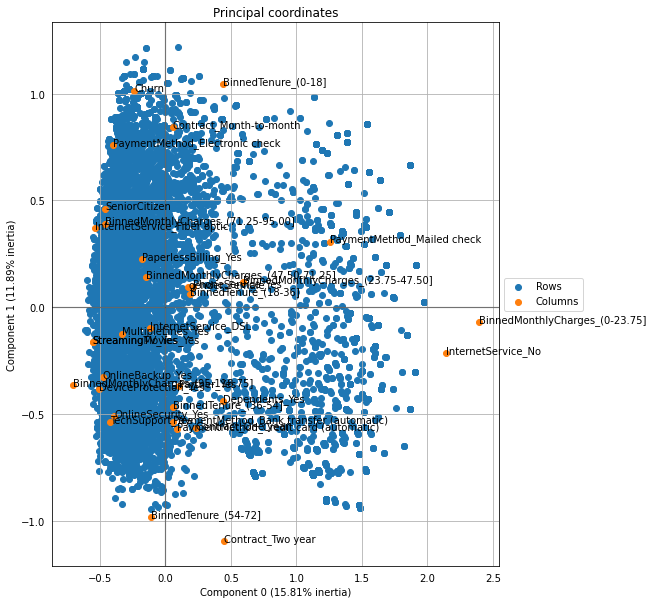

In [26]:
ax = churn_ca.plot_coordinates(
        X=df_dummies,
        ax=None,
        figsize=(8, 10),
        show_row_labels=False,
               ).legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Logistic Regression

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [28]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [29]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8102345415778252


AxesSubplot(0.125,0.125;0.775x0.755)


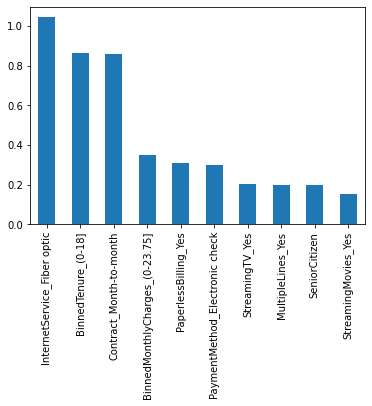

In [30]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


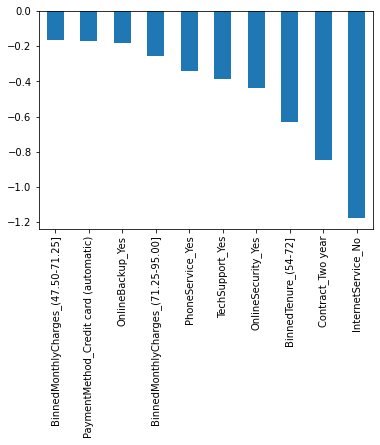

In [31]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))